## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn import ensemble
from sklearn.metrics import plot_confusion_matrix

## Carregando os dados

In [ ]:
#Carregando o Dataset 
dataset = pd.read_csv(r'https://raw.githubusercontent.com/RHero-UFRPE/RHero-ML/entrga_cinco/diabetes.csv')

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Verificando o tamanho
dataset.shape

(768, 9)

In [ ]:
#Verificano se existem valores nulos no dataset
dataset.isnull().values.any()

False

# Frequência da varivável a ser prevista

Outcome True: 268
Outcome False: 500


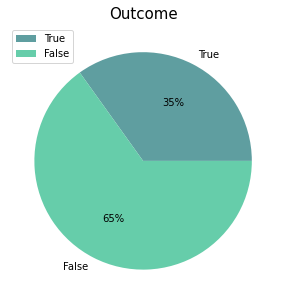

In [ ]:
num_true = len(dataset.loc[dataset['Outcome'] == 1])
num_false = len(dataset.loc[dataset['Outcome'] == 0])

num = [num_true, num_false]
name = ['True', 'False']

plt.figure(figsize=(40, 5))

plt.pie([num_true, num_false], labels = name, autopct='%1.f%%', colors= ["#5F9EA0", '#66CDAA'])
plt.title("Outcome", fontsize = 15)
plt.legend()

print("Outcome True: {0}".format(num_true))
print("Outcome False: {0}".format(num_false))

plt.show()

## Analisando correlações

In [ ]:
def plot_corr(data, size=15):
    corr = data.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

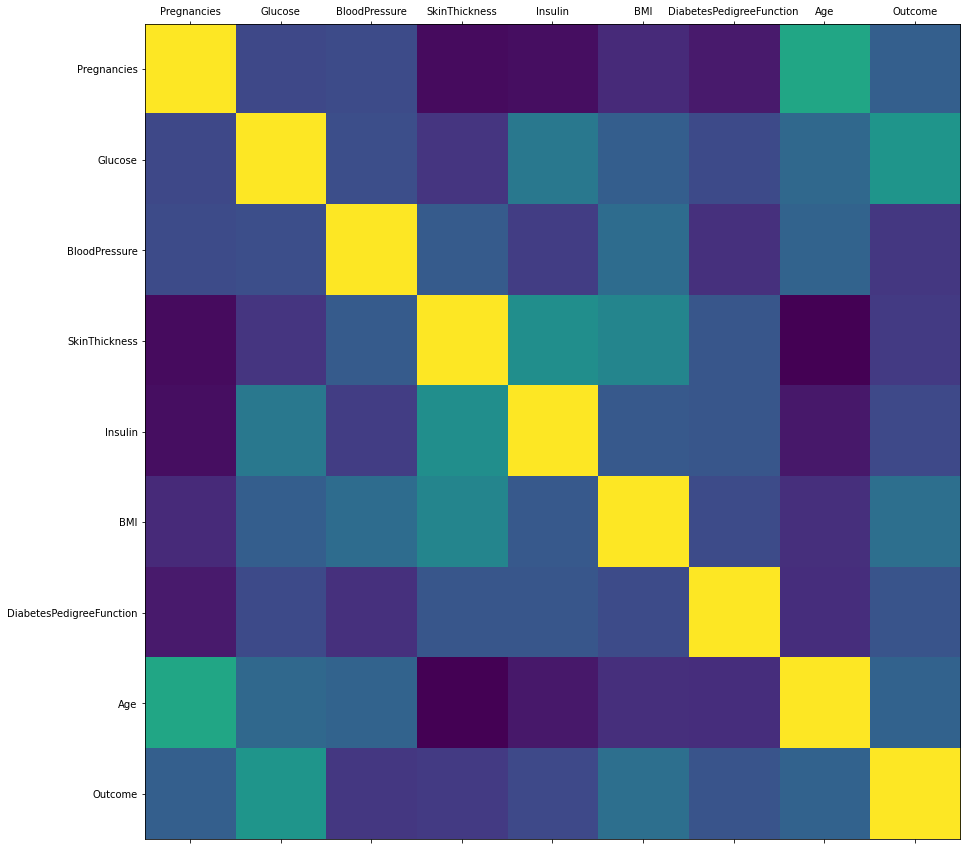

In [ ]:
plot_corr(dataset)

In [ ]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Fazendo a divisão do dataset para a parte de treino e de teste.

In [ ]:
#Seleção dos atributos
atributos = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]

In [ ]:
# Variavel para ser prevista
atributo_prev = ['Outcome']

In [ ]:
# Guardando as seleções em variáveis
atributos = dataset[atributos].values
variavel_prev = dataset[atributo_prev].values

In [ ]:
#Aplicando a função de split 
atributos_treino, atributos_teste, variavel_prev_treino, variavel_prev_teste = train_test_split(atributos,variavel_prev,test_size=0.3,random_state=42)

In [ ]:
# Frequência da divisão do dataset em parte de treino e de teste 
print("{0:0.2f}% nos dados de treino". format((len(atributos_treino)/len(dataset.index)) * 100 ))
print("{0:0.2f}% nos dados de teste". format((len(atributos_teste)/len(dataset.index)) * 100 ))

69.92% nos dados de treino
30.08% nos dados de teste


Outcome True: 188
Outcome False: 349


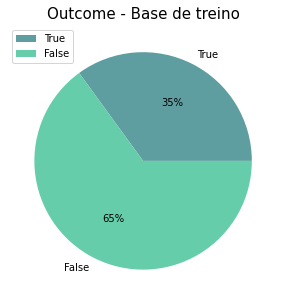

In [ ]:
#Frequência do atributo Outcome na base de treino

treino_true = num_zeros = (variavel_prev_treino == 1).sum()
treino_false = num_zeros = (variavel_prev_treino == 0).sum()

plt.figure(figsize=(40, 5))

plt.pie([treino_true, treino_false], labels = name, autopct='%1.f%%', colors= ["#5F9EA0", '#66CDAA'])
plt.title("Outcome - Base de treino", fontsize = 15)
plt.legend()

print("Outcome True: {0}".format(treino_true))
print("Outcome False: {0}".format(treino_false))

plt.show()

Outcome True: 80
Outcome False: 151


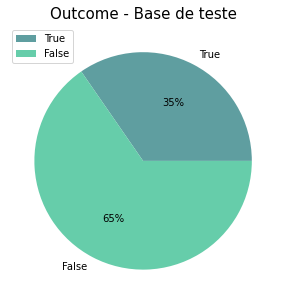

In [ ]:
#Frequência do atributo Outcome na base de teste

teste_true = num_zeros = (variavel_prev_teste == 1).sum()
teste_false = num_zeros = (variavel_prev_teste == 0).sum()

plt.figure(figsize=(40, 5))

plt.pie([teste_true, teste_false], labels = name, autopct='%1.f%%', colors= ["#5F9EA0", '#66CDAA'])
plt.title("Outcome - Base de teste", fontsize = 15)
plt.legend()

print("Outcome True: {0}".format(teste_true))
print("Outcome False: {0}".format(teste_false))

plt.show()

## Identificando valores "Missing" (Zeros) presentes nos atributos do dataset

In [ ]:
print("{0} linhas no dataset".format(len(dataset)))
print("Linhas missing Pregnancies: {0}".format(len(dataset.loc[dataset['Pregnancies'] == 0])))
print("Linhas missing Glucose: {0}".format(len(dataset.loc[dataset['Glucose'] == 0])))
print("Linhas missing BloodPressure: {0}".format(len(dataset.loc[dataset['BloodPressure'] == 0])))
print("Linhas missing SkinThickness: {0}".format(len(dataset.loc[dataset['SkinThickness'] == 0])))
print("Linhas missing Insulin: {0}".format(len(dataset.loc[dataset['Insulin'] == 0])))
print("Linhas missing BMI: {0}".format(len(dataset.loc[dataset['BMI'] == 0])))
print("Linhas missing DiabetesPedigreeFunction: {0}".format(len(dataset.loc[dataset['DiabetesPedigreeFunction'] == 0])))
print("Linhas missing Age: {0}".format(len(dataset.loc[dataset['Age'] == 0])))

768 linhas no dataset
Linhas missing Pregnancies: 111
Linhas missing Glucose: 5
Linhas missing BloodPressure: 35
Linhas missing SkinThickness: 227
Linhas missing Insulin: 374
Linhas missing BMI: 11
Linhas missing DiabetesPedigreeFunction: 0
Linhas missing Age: 0


In [ ]:
#Tratando os valores 'Missing'
full_missing_values = SimpleImputer(missing_values = 0, strategy = "mean", fill_value=None, verbose=0, copy=True)

atributos_treino = full_missing_values.fit_transform(atributos_treino)
atributos_teste = full_missing_values.fit_transform(atributos_teste)

## Aplicando o Random Forest

In [ ]:
modelo_RF = RandomForestClassifier(random_state= 42)
modelo_RF.fit(atributos_treino, variavel_prev_treino.ravel())
predict_RF = modelo_RF.predict(atributos_teste)

In [ ]:
#Acurárcia,Confusion Matrix e Classification Report

print("Acurácia do modelo")
print("")

print("{0:.2f}%".format(metrics.accuracy_score(variavel_prev_teste, predict_RF) * 100))
print("")

print("Confusion Matrix")
print("")

print("{0}".format(metrics.confusion_matrix(variavel_prev_teste, predict_RF, labels = [1,0])))
print(" ")

print("Classification Report")
print("")

print(metrics.classification_report(variavel_prev_teste, predict_RF, labels = [1,0]))

Acurácia do modelo

74.03%

Confusion Matrix

[[ 52  28]
 [ 32 119]]
 
Classification Report

              precision    recall  f1-score   support

           1       0.62      0.65      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



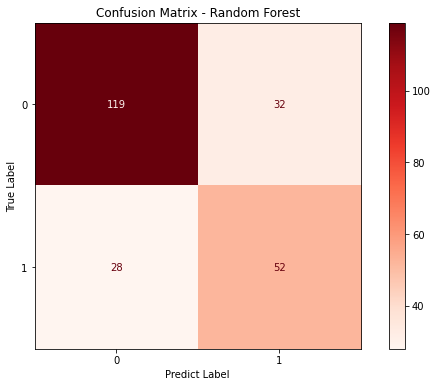

In [ ]:
matrix_RF = plot_confusion_matrix(modelo_RF, atributos_teste, variavel_prev_teste, cmap=plt.cm.Reds, values_format = '.5g')
matrix_RF.ax_.set_title('Confusion Matrix - Random Forest', color = 'black')
plt.xlabel('Predict Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

## Gradiente Boosting

In [ ]:
modelo_GB = ensemble.GradientBoostingClassifier(random_state=42,n_estimators=100)
modelo_GB.fit(atributos_treino, variavel_prev_treino.ravel())
predict_GB = modelo_GB.predict(atributos_teste)

In [ ]:
#Acurácia, Confusion Matrix e Classification Report

print("Acurácia do modelo")
print("")

print("{0:.2f}%".format(metrics.accuracy_score(variavel_prev_teste, predict_GB) * 100))
print("")

print("Confusion Matrix")
print("")

print("{0}".format(metrics.confusion_matrix(variavel_prev_teste, predict_GB, labels = [1,0])))
print(" ")

print("Classification Report")
print("")

print(metrics.classification_report(variavel_prev_teste, predict_GB, labels = [1,0]))

Acurácia do modelo

73.59%

Confusion Matrix

[[ 54  26]
 [ 35 116]]
 
Classification Report

              precision    recall  f1-score   support

           1       0.61      0.68      0.64        80
           0       0.82      0.77      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



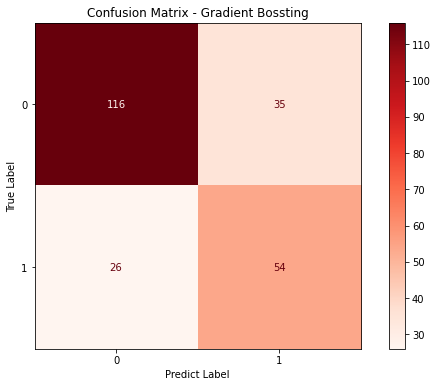

In [ ]:
matrix = plot_confusion_matrix(modelo_GB, atributos_teste, variavel_prev_teste, cmap=plt.cm.Reds, values_format = '.5g')
matrix.ax_.set_title('Confusion Matrix - Gradient Bossting', color = 'black')
plt.xlabel('Predict Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()